# **Feature Engineering and Visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_data.csv")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## *Feature Engineering*

### log transform

In [3]:
# Create a new price_log and sqft_lot_log to keep the original data
df['price_log'] = np.log(df['price'])
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])

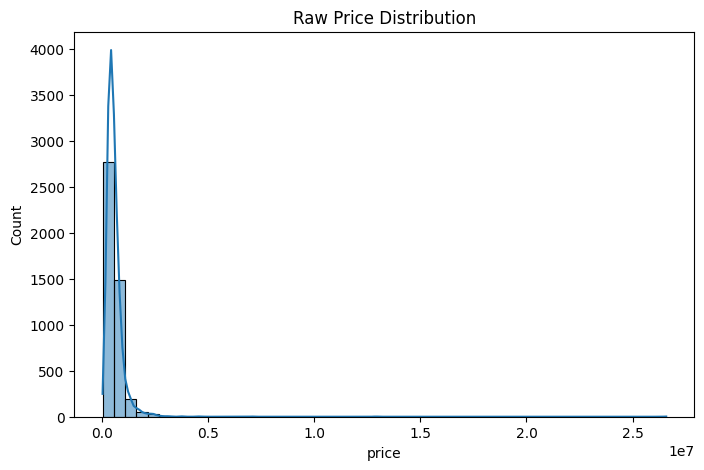

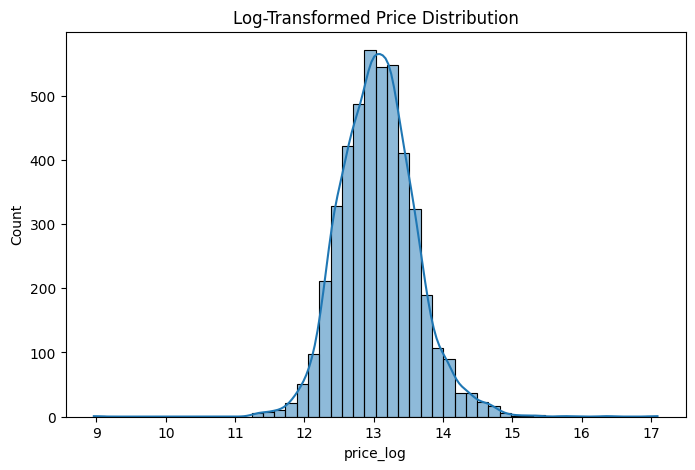

In [4]:
# 
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Raw Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

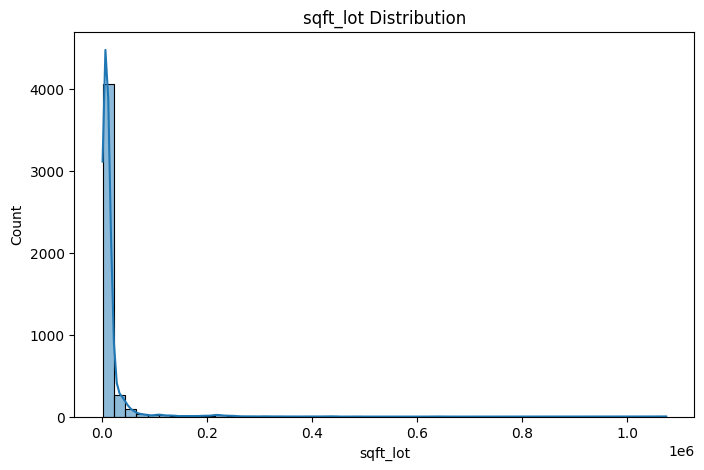

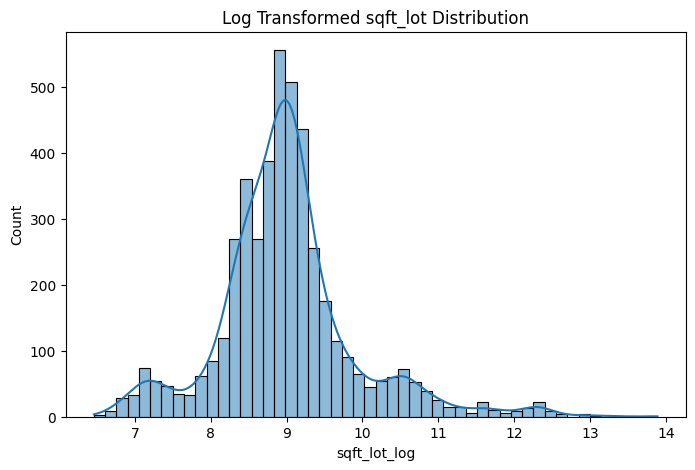

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['sqft_lot'], bins=50, kde=True)
plt.title("sqft_lot Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['sqft_lot_log'], bins=50, kde=True)
plt.title("Log Transformed sqft_lot Distribution")
plt.show()

### date splitting

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

### yr_renovated column

In [7]:
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)

### split state zip → state / zip code

In [8]:
df[['state', 'zipcode']] = df['statezip'].str.split(" ", expand=True)
df.drop(columns=['statezip'], inplace=True)

### delete useless columns

In [9]:
df.drop(columns=['street', 'country'], inplace=True)

## *Visualization*

### house size vs. price

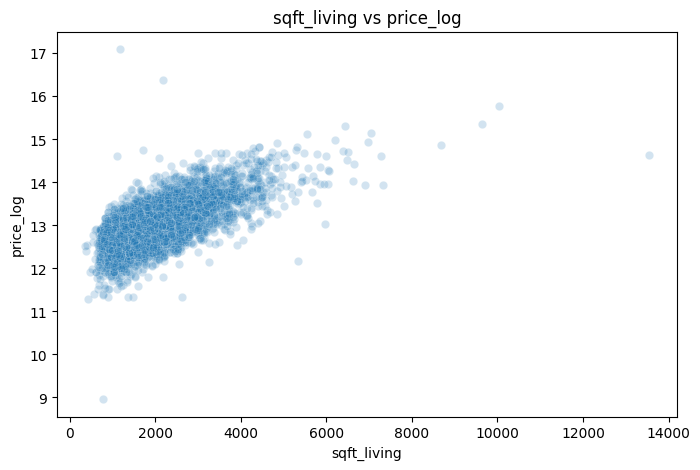

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price_log', data=df, alpha=0.2)
plt.title("sqft_living vs price_log")
plt.show()

### correlation heatmap

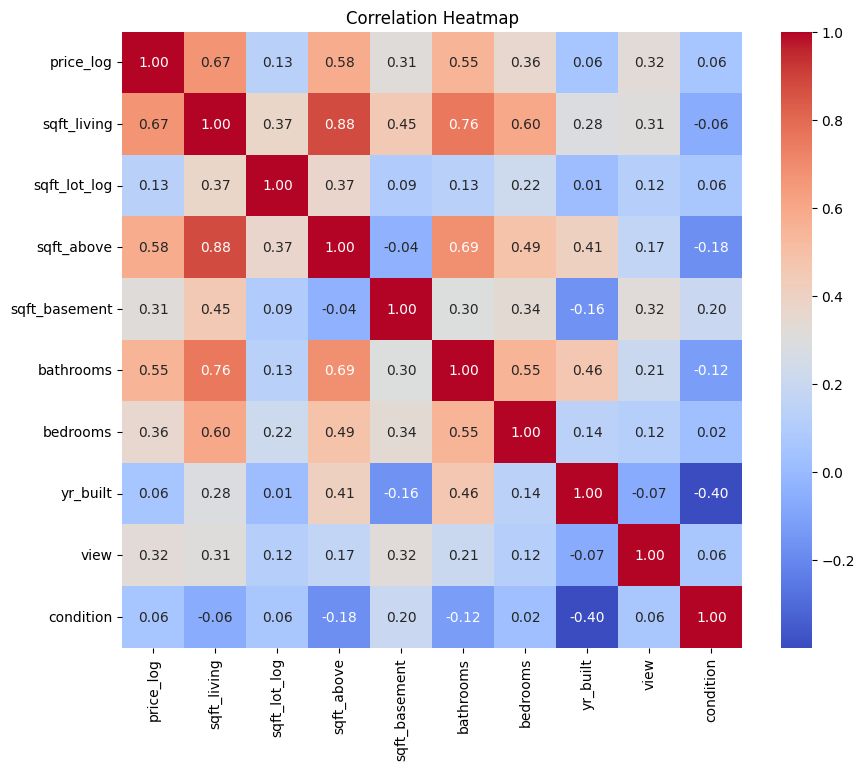

In [11]:
numeric_cols = ['price_log', 'sqft_living', 'sqft_lot_log',
                'sqft_above', 'sqft_basement', 'bathrooms',
                'bedrooms', 'yr_built', 'view', 'condition']

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Feature Engineering - additional features
df['house_age'] = df['year_sold'] - df['yr_built']
df['above_ratio'] = df['sqft_above'] / df['sqft_living']
df['basement_ratio'] = df['sqft_basement'] / df['sqft_living']
df['bath_ratio'] = df['bathrooms'] / df['bedrooms']

# Handle potential inf or NaN values in 'bath_ratio' resulting from division by zero
df['bath_ratio'] = df['bath_ratio'].replace([np.inf, -np.inf], 0)
df['bath_ratio'] = df['bath_ratio'].fillna(0)

df[['house_age', 'above_ratio', 'basement_ratio', 'bath_ratio']].head()

drop_cols = ['yr_built']
df = df.drop(columns=drop_cols)

## *One-Hot Encoding*

In [13]:
df_encoded = pd.get_dummies(df,
                            columns=['city', 'state', 'zipcode'],
                            drop_first=True)

df_encoded.shape

(4551, 141)

In [15]:
# Save the basic feature-engineered data to the data directory.
df_encoded.to_csv("../data/model_ready.csv", index=False)